**The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. For this assignment, the dataset will be used to train the model for predicting the price of the property in the market.**

In [76]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

*Import the dataset:(the dataset should be placed in the same folder as the notebook)*

In [77]:
import pandas as pd
df = pd.read_csv("data_Yichen.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00,313000.0,3,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340,0.0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00,2384000.0,5,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370,280.0,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00,342000.0,3,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930,0.0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00,420000.0,3,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000,1000.0,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00,550000.0,4,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140,800.0,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4595 non-null   float64
 5   sqft_lot       4596 non-null   float64
 6   floors         4599 non-null   float64
 7   waterfront     4596 non-null   float64
 8   view           4597 non-null   float64
 9   condition      4593 non-null   float64
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4596 non-null   float64
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [79]:
objects= ["date","street","city","statezip","country"]
for i in (objects):
    print(df[i].value_counts())
    print("-------------------------------------")

2014-06-23 0:00    142
2014-06-26 0:00    131
2014-06-25 0:00    131
2014-07-08 0:00    127
2014-07-09 0:00    121
                  ... 
2014-06-07 0:00      4
2014-07-06 0:00      3
2014-05-11 0:00      2
2014-07-04 0:00      2
2014-05-17 0:00      1
Name: date, Length: 70, dtype: int64
-------------------------------------
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
5010 Greenwood Ave N     2
23620 SE 243rd Pl        2
5703 Charlotte Ave SE    2
                        ..
15712 NE 136th Pl        1
16232 SE 10th St         1
14102 SE 42nd St         1
16032 SE 170th Pl        1
12036 23rd Ave S         1
Name: street, Length: 4525, dtype: int64
-------------------------------------
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline       

In [80]:
# Since there is a big difference between numbers of cities, we
# will only have 5 categories: Seattle, Renton, Bellevue, Redmon and others
df.loc[(df.city != "Seattle")&(df.city != "Renton")
       &(df.city != "Bellevue")&(df.city != "Redmond"),"city"] = "Other"

df_cat = df[["city"]]

In [81]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4595.000000,4.596000e+03,4599.000000,4596.00000,4597.000000,4593.000000,4600.000000,4596.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.444178,1.485578e+04,1.511959,0.00718,0.240157,3.451339,1827.265435,312.353133,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.624306,3.589932e+04,0.538299,0.08444,0.777578,0.677117,862.168977,464.247819,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.00000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.00000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.00000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.00000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.00000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


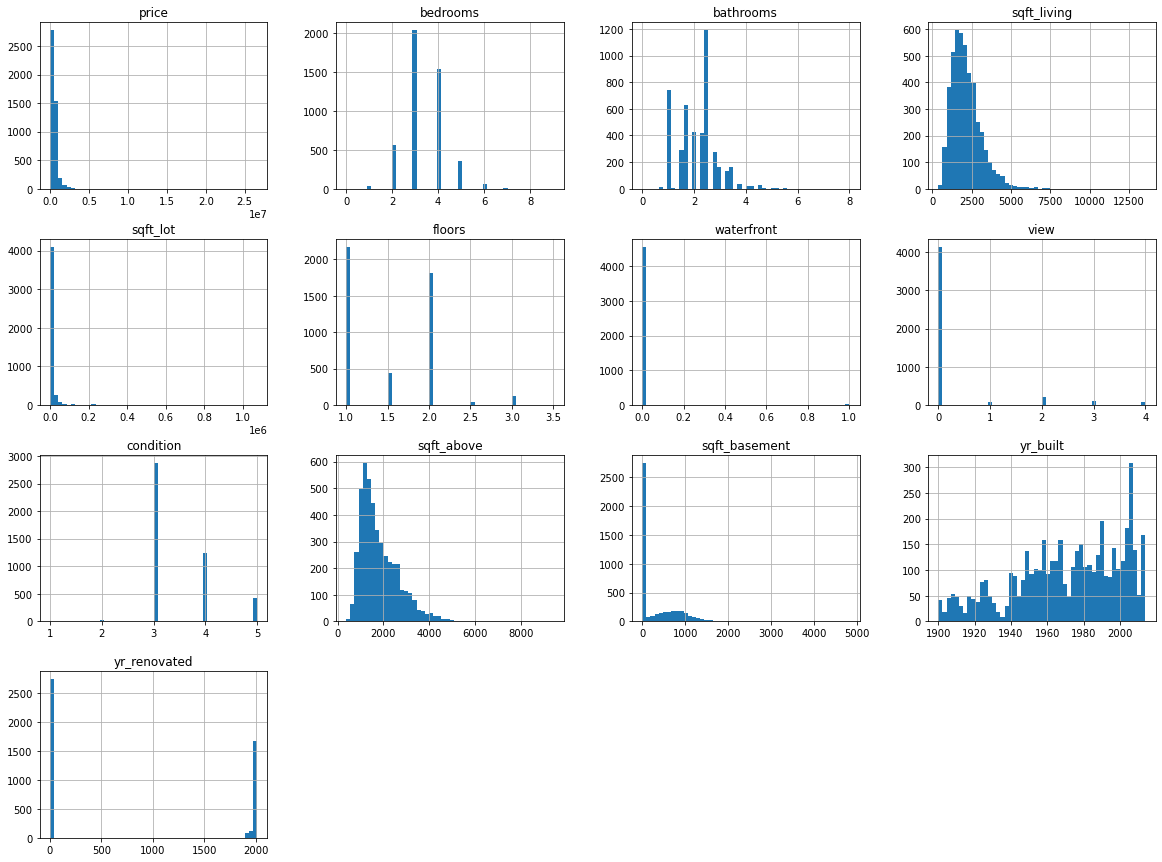

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# Test Set

In [83]:
# to make this notebook's output identical at every run
np.random.seed(5)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=5)

test_set.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
240,2014-05-07 0:00,630000.0,3,2.5,2680.0,327135.0,2.0,0.0,0.0,3.0,2680,0.0,1995,0,25339 SE 248th St,Other,WA 98051,USA
3878,2014-07-02 0:00,305000.0,3,1.0,1580.0,7424.0,1.0,0.0,0.0,3.0,1010,570.0,1962,2003,12633 SE 158th St,Renton,WA 98058,USA
818,2014-05-16 0:00,433000.0,4,2.5,2280.0,7568.0,2.0,0.0,0.0,4.0,2280,0.0,2001,0,2207 Kennewick Pl NE,Renton,WA 98056,USA
1877,2014-06-04 0:00,275000.0,2,1.0,770.0,8149.0,1.0,0.0,0.0,5.0,770,0.0,1948,1985,15346-15348 25th Ave NE,Other,WA 98155,USA
2602,2014-06-16 0:00,340000.0,3,2.5,1212.0,1174.0,3.0,0.0,0.0,3.0,1212,0.0,2004,2003,11716 16th Ave NE,Seattle,WA 98125,USA


# Data Cleaning
**drop certain columns for the ease of model building.
"date","street","statezip" will be dropped as these have too many unique values and leads to overfitting when creating dummy variables for them.
"country" will be dropped as it only has 1 unique value, and will contribute nothing to the predicting model.**

In [84]:
df = train_set.drop("price", axis=1) # drop labels for training set
df_labels = train_set["price"].copy()

In [85]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1006,2014-05-20 0:00,4,1.50,2500.0,6300.0,1.0,NaN,0.0,4.0,1500,1000.0,1961,2001,24911-24917 38th Ave S,Other,WA 98032,USA
840,2014-05-16 0:00,3,2.25,NaN,1377.0,2.0,0.0,0.0,3.0,1290,120.0,2005,0,2012 NW Boulder Way Dr,Other,WA 98027,USA
4437,2014-05-30 0:00,3,2.50,NaN,19821.0,2.0,0.0,0.0,3.0,2260,0.0,1994,0,17207 190th Ave SE,Renton,WA 98058,USA
587,2014-05-13 0:00,3,2.00,1480.0,6600.0,1.0,0.0,2.0,NaN,740,740.0,1943,2002,4115 SW 106th St,Seattle,WA 98146,USA
680,2014-05-14 0:00,3,2.25,1970.0,3716.0,2.0,0.0,NaN,3.0,1970,0.0,1997,0,504 Shelton Ct NE,Renton,WA 98056,USA


In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [87]:
#drop the object column first to compute median of each attribute
#then use imputer to fill na
df_num = df.drop(columns=objects)
imputer.fit(df_num)
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df.index)
df_tr.loc[sample_incomplete_rows.index.values]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1006,4.0,1.50,2500.0,6300.0,1.0,0.0,0.0,4.0,1500.0,1000.0,1961.0,2001.0
840,3.0,2.25,1982.0,1377.0,2.0,0.0,0.0,3.0,1290.0,120.0,2005.0,0.0
4437,3.0,2.50,1982.0,19821.0,2.0,0.0,0.0,3.0,2260.0,0.0,1994.0,0.0
587,3.0,2.00,1480.0,6600.0,1.0,0.0,2.0,3.0,740.0,740.0,1943.0,2002.0
680,3.0,2.25,1970.0,3716.0,2.0,0.0,0.0,3.0,1970.0,0.0,1997.0,0.0


# Handling Text and Categorical Attributes


In [88]:
df = df.drop(columns = ["date","street","statezip","country"])

In [89]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [0.],
       [2.],
       [4.],
       [2.],
       [1.],
       [1.],
       [4.]])

In [90]:
ordinal_encoder.categories_

[array(['Bellevue', 'Other', 'Redmond', 'Renton', 'Seattle'], dtype=object)]

In [91]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

# Transformation Pipelines

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["city"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)


# Create a Test Set （Stratified）

In [93]:
# To use stratified test set, we need a proportion test to prove
# there is no bias in the dataset.
# df_tr["sqft_living"].hist()

# df_tr["sqft_living"].isnull().count()

# import numpy as np
# # divide them into different bins to form categories
# df_tr["living_cat"] = pd.cut(df_tr["sqft_living"],
#                                bins=[0.,2000., 4000., 6000., np.inf],
#                                labels=[1, 2, 3, 4])

# print(df_tr["living_cat"].value_counts())
# df_tr["living_cat"].hist()

# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df_tr, df_tr["living_cat"]):
#     strat_train_set = df_tr.loc[train_index]
#     strat_test_set = df_tr.loc[test_index]
    

# strat_test_set["living_cat"].value_counts() / len(strat_test_set)

# df_tr["living_cat"].value_counts() / len(df_tr)

# def living_cat_proportions(data):
#     return data["living_cat"].value_counts() / len(data)

# train_set, test_set = train_test_split(df_tr, test_size=0.2, random_state=5)

# compare_props = pd.DataFrame({
#     "Overall": living_cat_proportions(df_tr),
#     "Stratified": living_cat_proportions(strat_test_set),
#     "Random": living_cat_proportions(test_set),
# }).sort_index()
# compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
# compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# compare_props

# #random error is much larger than the strat error, therefore
# #will not use the randomly chosen test_set, instead use stratified one.
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("living_cat", axis=1, inplace=True)

# #random error is much larger than the strat error, therefore
# #will not use the randomly chosen test_set, instead use stratified one.
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("living_cat", axis=1, inplace=True)

# strat_train_set.info()

# Looking for Correlations

In [94]:
df1 = pd.read_csv("data_Yichen.csv")
df_corr = df1.drop(columns=objects)

corr_matrix = df_corr.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.430392
sqft_above       0.367570
bathrooms        0.327110
view             0.228136
sqft_basement    0.210223
bedrooms         0.200336
floors           0.151431
waterfront       0.135641
sqft_lot         0.050509
condition        0.034956
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='view', ylabel='b

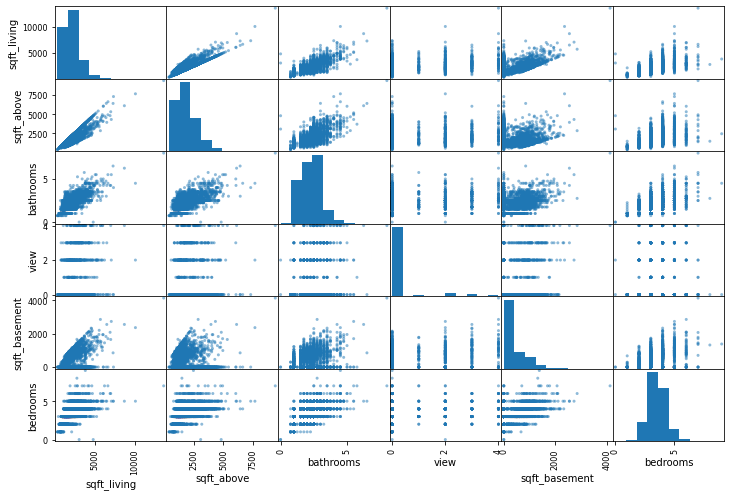

In [95]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["sqft_living", "sqft_above", "bathrooms",
              "view","sqft_basement","bedrooms"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Experimenting with Attribute Combinations


In [96]:
df1["average_bedrooms_per_floor"] = df1["bedrooms"]/df1["floors"]
df1["average_bathrooms_per_floor"] = df1["bathrooms"]/df1["floors"]
corr_matrix = df1.corr()
corr_matrix["price"].sort_values(ascending=False)

price                          1.000000
sqft_living                    0.430392
sqft_above                     0.367570
bathrooms                      0.327110
view                           0.228136
sqft_basement                  0.210223
bedrooms                       0.200336
average_bathrooms_per_floor    0.164544
floors                         0.151431
waterfront                     0.135641
sqft_lot                       0.050509
condition                      0.034956
yr_built                       0.021857
average_bedrooms_per_floor    -0.011075
yr_renovated                  -0.028774
Name: price, dtype: float64

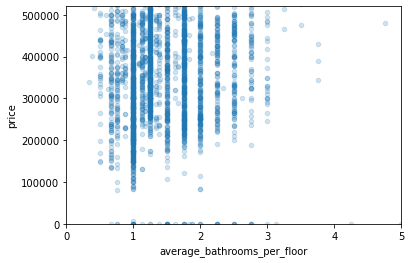

In [97]:
df1.plot(kind="scatter", x="average_bathrooms_per_floor", y="price",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the Data for Machine Learning Algorithms

# Training and Evaluating on the Training Set

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [99]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

538713.1484996581

In [100]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, predictions)
lin_mae

159657.31684663426

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=5)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=5)

In [102]:
predictions1 = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, predictions1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

652.7533657682196

# Better Evaluation Using Cross-Validation


In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 350772.38431538 1418616.45790195  740528.49557979  392440.96019702
  276080.59743002  388185.63128012  376393.97917782  721444.12502822
  365771.36656372  306692.84030325]
Mean: 533692.6837777311
Standard deviation: 332646.85443510785


In [104]:
lin_scores = cross_val_score(lin_reg,  df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 213316.44081161 1400233.65017173  690411.2474499   251743.54560485
  216513.38748569  262476.3070155   268396.8660667   247897.18633525
  309477.85014823  196293.84615839]
Mean: 405676.0327247834
Standard deviation: 358335.01256003545


In [105]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=5)
forest_reg.fit(df_prepared, df_labels)

housing_predictions2 = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, housing_predictions2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 225357.62891243 1400841.02042197  771628.41960116  691924.509252
  374569.64423133  277788.30913113  388115.98138975  249232.57618532
  359887.78954215  266623.91550827]
Mean: 500596.97941755084
Standard deviation: 348161.6579004736


# Fine-tuning of the model

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 16 (4×4) combinations of hyperparameters
    {'n_estimators': [5, 10, 50,100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=5)
# train across 5 folds, that's a total of (16+6)*5=110 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [107]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [108]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=50, random_state=5)

In [109]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01702981, 0.08531379, 0.27736064, 0.13541098, 0.01277634,
       0.00647351, 0.02481408, 0.03460658, 0.13453295, 0.04741402,
       0.12963789, 0.02452048, 0.00814552, 0.0320854 , 0.00195467,
       0.00381887, 0.02410446])

In [110]:
importance = pd.DataFrame(list(zip(df.columns,feature_importances)),columns=
             ['predictor','feature importance'])
print(importance.sort_values(by=['feature importance'],ascending = False).head(5))

      predictor  feature importance
2   sqft_living            0.277361
3      sqft_lot            0.135411
8    sqft_above            0.134533
10     yr_built            0.129638
1     bathrooms            0.085314


# Evaluate Your System on the Test Set

In [111]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(columns = ["price","date","street","statezip","country"], axis=1)
y_test = test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [112]:
final_rmse

235013.98764417527

In [114]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([193478.93197026, 270238.878884  ])